<a href="https://colab.research.google.com/github/alexandragrecu/Bark-and-Purr/blob/master/Linear_regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **🏹 Introduction**

We will try to build a linear regression model for: 

- ✅ Ozone concentration in the atmosphere given the weather variables for a particular city in America. We will use Linear Regreesion method (one cause: Ozone concentration and three effects: Pressure, Temperature and Humidity). Then we will apply one-way ANOVA method and compare the differences.

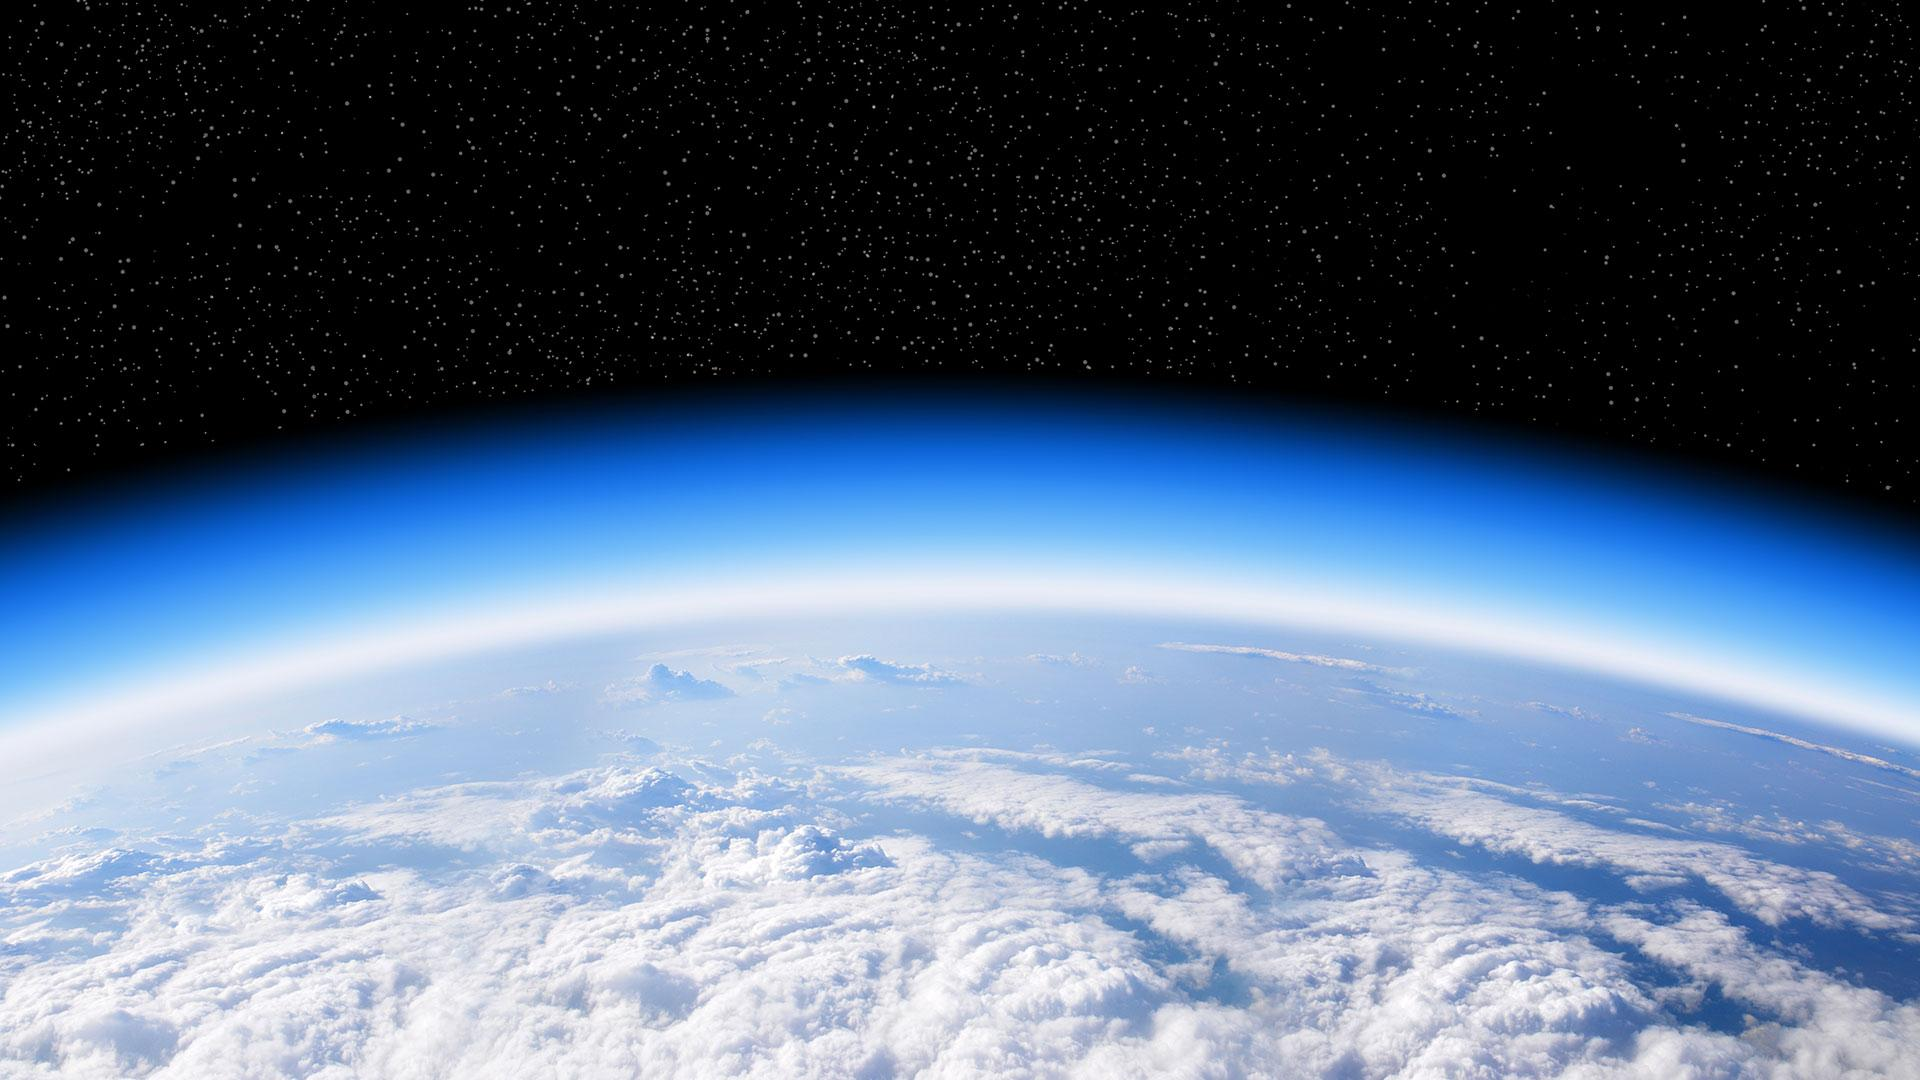

# **2. 📖 The datasets**

For this project, we will use 1 dataset:
ntains 204 records of ozone concentration made in a year. Ir contains 13 columns that capture various aspects as ozone concentration, pressure, wind speed or temperature from a particular region in the US. We are interested in the relationship of two aspects:
  - Ozone concentration
  - Temperature (Of ElMonde city)

  The dataset was taken from Github and it can be found [here](https://github.com/selva86/datasets/blob/master/ozone.csv).

# **3.📚 Import packages**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **4. 📘 Read the dataset**

In [4]:
uploaded = files.upload()

Saving ozone.csv to ozone.csv


In [6]:
ozone_data = pd.read_csv('ozone.csv')

In [7]:
ozone_data.head()

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120


# **4. 🪄 Preprocessing the dataset**
We will: 
- rename the columns
- check if there are any NA values

In [8]:
ozone_data.isna().sum()

Month                    0
Day_of_month             0
Day_of_week              0
ozone_reading            0
pressure_height          0
Wind_speed               0
Humidity                 0
Temperature_Sandburg     0
Temperature_ElMonte      0
Inversion_base_height    0
Pressure_gradient        0
Inversion_temperature    0
Visibility               0
dtype: int64

In [9]:
ozone_data.dtypes

Month                      int64
Day_of_month               int64
Day_of_week                int64
ozone_reading            float64
pressure_height            int64
Wind_speed                 int64
Humidity                   int64
Temperature_Sandburg       int64
Temperature_ElMonte      float64
Inversion_base_height      int64
Pressure_gradient          int64
Inversion_temperature    float64
Visibility                 int64
dtype: object

In [10]:
ozone_data = ozone_data.rename(columns={'ozone_reading': 'Ozone', 'pressure_height': 'Pressure'})

In [12]:
ozone_data.head()

,Month,Day_of_month,Day_of_week,Ozone,Pressure,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120


# **5.🔨 Building a regression linear model**

In [13]:
formula = 'Ozone ~ Temperature_ElMonte + Pressure + Humidity'

In [14]:
model = ols(formula, data=ozone_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.61e-50
Time:                        13:01:22   Log-Likelihood:                -595.26
No. Observations:                 203   AIC:                             1199.
Df Residuals:                     199   BIC:                             1212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              55.0716     36.492      1.509      0.133     -16.888     127.032
Temperature_ElMonte     0.6138      0.068      9.050      0.000       0.480       0.748
Pressure               -0.0148      0.007     -2.152      0.033      -0.028      -0.001
Humidity                0.1184      0.017      7.002      0.000       0.085       0.152
==============================================================================
Omnibus:                        1.983   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.943
Skew:                           0.237   Prob(JB):                        0.379
Kurtosis:                       2.929   Cond. No.                     6.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The equation is: 

Ozone concentration = 0.6138 * Temperature_ELMonte - 0.0148 * presure_height + 0.1184 * Humidity

In [15]:
predicted_values = model.predict(ozone_data)

# **🔎 6. Analysis of residuals**

In [16]:
resid = model.resid

# **6.1 🧪 Shapiro's test for testing the normality of data**

Normality assumption is meet for our model, applying the test we obtain the p-value = 0.52, so we don't reject the null hypothesis.

In [17]:
from scipy.stats import shapiro
shapiro(resid)

(0.9935367107391357, 0.5215371251106262)

# **6.2 🧪 Homoscedasticity test**

When we analyse the residual plot, we see that the points have a random pattern, and so we can say that the homoscedastic criteria is respected.

In [18]:
resid = np.abs(resid)

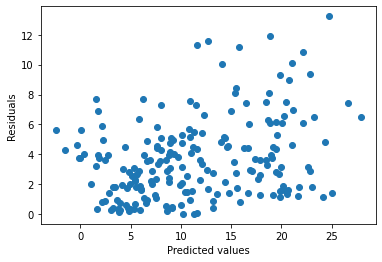

In [20]:
_ = plt.plot(predicted_values, resid, marker='o', linestyle='None')
_ = plt.xlabel('Predicted values')
_ = plt.ylabel('Residuals')
plt.show()

# **From 6.1 and 6.2 we can seay that the model found is a good model.**

# **7.〽️ Applying ANOVA**
Because we try to determine the interaction effect between three independent variables (Temperature, Pressure and Humidity) on a continuous dependent variable (Ozone concentration), we will apply a three-way ANOVA.

After performing 3-way ANOVA, we can see that the results are similar to the liniar regression model, the intercept has no significant effect, whearas Temperature, Pressure and Humidity have significant effect in predicting the Ozone concentration.

In [21]:
anova_table = sm.stats.anova_lm(model, typ=3)

In [22]:
anova_table

,sum_sq,df,F,PR(>F)
Intercept,47.929249,1.0,2.277544,1.328456e-01
Temperature_ElMonte,1723.733644,1.0,81.909896,1.312028e-16
Pressure,97.462224,1.0,4.631296,3.259817e-02
Humidity,1031.630551,1.0,49.021931,3.799833e-11
Residual,4187.808952,199.0,NaN,NaN
